In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_eigen(M):
    w, v = np.linalg.eig(M)
    v = v.T
    eig_val = np.sort(w)[::-1]
    eig_vec = np.array([v[np.where(eig_val[i] == w)] for i in range(len(eig_val))])
    return eig_val, eig_vec

def print_eigen(eig_val, eig_vec):
    for w, v in zip(eig_val, eig_vec):
        print('Eigenvalue: ', np.around(w, 3), '; With eigenvector: ', np.around(v, 3))

def plot_spectrum(eig_val):
    an = np.linspace(0, 2 * np.pi, 100)
    fig, ax = plt.subplots()
    ax.plot(np.cos(an), np.sin(an), c='k', linewidth=0.5)
    ax.scatter(eig_val.real, eig_val.imag)
    ax.axis('equal')

## Problem 7.1

### a)

$$T=\begin{bmatrix}
    0 & 0 & 1/4 & 0 & 0 \\
    0 & 0 & 1/4 & 0 & 0 \\
    1/2 & 1 & 0 & 1/2 & 0 \\
    0 & 0 & 1/4 & 0 & 0 \\
    1/2 & 0 & 1/4 & 1/2 & 1 \\
\end{bmatrix}$$

### b)

Every entires of the matrix are non-negative and the column sum is 1 for all column

In [3]:
T1 = np.array([[0, 0 ,1/4, 0, 0],
              [0, 0 ,1/4, 0, 0],
              [1/2, 1, 0, 1/2, 0],
              [0, 0, 1/4, 0, 0],
              [1/2, 0, 1/4, 1/2, 1]])

####  Determine the eigenvalues:

In [4]:
eig_val, eig_vec = get_eigen(T1)
print_eigen(eig_val, eig_vec)

Eigenvalue:  1.0 ; With eigenvector:  [[0. 0. 0. 0. 1.]]
Eigenvalue:  0.707 ; With eigenvector:  [[-0.149 -0.149 -0.422 -0.149  0.869]]
Eigenvalue:  0.0 ; With eigenvector:  [[ 0.707 -0.     0.    -0.707 -0.   ]]
Eigenvalue:  -0.0 ; With eigenvector:  [[-0.5  0.5  0.  -0.5  0.5]]
Eigenvalue:  -0.707 ; With eigenvector:  [[ 0.301  0.301 -0.852  0.301 -0.052]]


Rescaled versions of eignevectors:
$$
\begin{align}
\lambda_1 = 1 && \vec{u_1} = (0, 0, 0, 0, 1) \\
\lambda_2 = 0.71 &&\vec{u_2} = (-0.17, -0.17, -0.49, -0.17, 1) \\
\lambda_3 = 0 &&\vec{u_3} = (-1, 0, 0, 1, 0) \\
\lambda_4 = -4.21*10^{-17} &&\vec{u_4} = (-2, 1, 0, 0, 1) \\
\lambda_5 = -0.71 &&\vec{u_5} = (-5.83, -5.83, 16.49, -5.83, 1) \\
\end{align}
$$

#### Plot the spectrum of T:
The spectrum of a matrix is the set of its eigenvalues

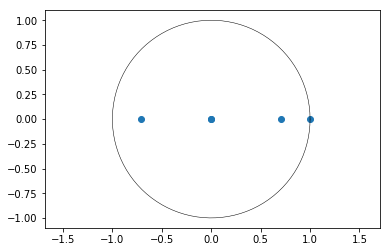

In [5]:
plot_spectrum(eig_val)

#### Confirm the statements of the Perron–Frobenius theorem:
A real square matrix with positive entries has a unique largest real eigenvalue and that the corresponding eigenvector can be chosen to have strictly positive components.

* T is a non-negative matrix
* spectral radius r = max|$\lambda_i$| --> $\lambda_1 = 1$ every oyher eignevalue is smaller then this
* r is an eigenvalue of T, and all components of the corresponding and left and right eignevectors are positive --> ????? [0. 0. 0. 0. 1.] all values should be bigger then 0... ?
* all other eigenvectors must have at least one negative component --> ok
* satisfies the inequalitie: $\min\limits_{i}\sum\limits_{j}{a_{ij}}\leq r \leq \max\limits_{i}\sum\limits_{j}{a_{ij}}$
$$
\min\limits_{i}\sum\limits_{j}{a_{ij}} = \frac{1}{4} \\
\max\limits_{i}\sum\limits_{j}{a_{ij}} = \frac{9}{4}
$$

#### Stationary distribution of the Markov chain: 
The one which belongs to eigenvalue: $\lambda_1 = 1 \quad \vec{u_1} = (0, 0, 0, 0, 1)$
* The stationary distribution is state five; which means i==j the cat and the mouse are in the same box

## Problem 7.2 Stochastic matrices

### a) Periodic, deterministic Markov chain

In [6]:
T2 = np.array([[0,0,0,1],
              [1,0,0,0],
              [0,1,0,0],
              [0,0,1,0]])

#### Draw the graph of the Markov chain:

#### Determine the eigenvalues and eigenvectors of T:

In [7]:
eig_val2, eig_vec2 = get_eigen(T2)
print_eigen(eig_val2, eig_vec2)

Eigenvalue:  (1+0j) ; With eigenvector:  [[-0.5+0.j -0.5+0.j -0.5+0.j -0.5+0.j]]
Eigenvalue:  1j ; With eigenvector:  [[ 0. -0.5j -0.5+0.j  -0. +0.5j  0.5+0.j ]]
Eigenvalue:  -1j ; With eigenvector:  [[ 0. +0.5j -0.5-0.j  -0. -0.5j  0.5-0.j ]]
Eigenvalue:  (-1+0j) ; With eigenvector:  [[-0.5+0.j  0.5+0.j -0.5+0.j  0.5+0.j]]


#### Plot the spectrum on the complex plane:

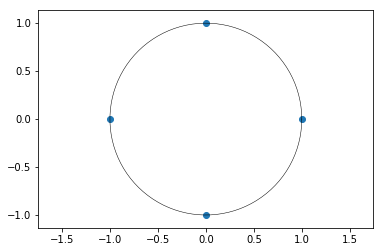

In [8]:
plot_spectrum(eig_val2)

#### Verify that there is one largest eigenvalue that is real, positive, and simple, and that this is the only eigenvalue with non-negative eigenvectors:

#### Which symmetry does the spectrum exhibit? What does this imply for lim𝑘→∞ 𝑇𝑘? 

#### Is the Markov chain ergodic?

### b) Aperiodic, non-equilibrium Markov chain

In [9]:
T3 = np.array([[0,0,0,1],
               [1/3,0,0,0],
               [1/3,1,0,0],
               [1/3,0,1,0]])

#### Draw the graph of the Markov chain:

#### Determine the eigenvalues and eigenvectors of T:

In [10]:
eig_val3, eig_vec3 = get_eigen(T3)
print_eigen(eig_val3, eig_vec3)

Eigenvalue:  (1+0j) ; With eigenvector:  [[0.626+0.j 0.209+0.j 0.417+0.j 0.626+0.j]]
Eigenvalue:  (-0.141+0.667j) ; With eigenvector:  [[-0.658+0.j     0.067+0.315j  0.498+0.124j  0.093-0.438j]]
Eigenvalue:  (-0.141-0.667j) ; With eigenvector:  [[-0.658-0.j     0.067-0.315j  0.498-0.124j  0.093+0.438j]]
Eigenvalue:  (-0.718+0j) ; With eigenvector:  [[ 0.753+0.j -0.349+0.j  0.137+0.j -0.541+0.j]]


#### Plot the spectrum on the complex plane:

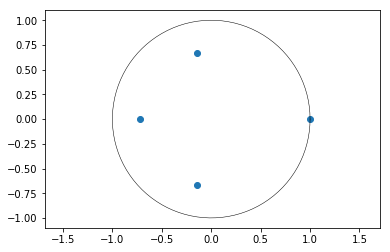

In [11]:
plot_spectrum(eig_val3)

#### Discuss the changes in the spectrum and how this affects the convergence to the stationary distribution:

#### Why does this distribution not describe an equilibrium situation?